Name: Jay Goyal

Roll no.: C017

Semester: VI

Program: B.Tech

Branch: EXTC

Date of performance: 5th March

Date of Submission: 12th March

Experiment Number: 6

Aim:


To write a program in PYTHON to implement DCT transform


Theory:

If 𝑇 is the transformation matrix and 𝑇′ is its transpose, forward transform of any 2D matrix 𝑓, is given by 𝐹=𝑇𝑓𝑇′

Similarly, inverse transform is given by 𝑓𝑛𝑒𝑤=𝑇′𝐹𝑇

Discrete Cosine Transform

The N X N Cosine Transform Matrix is given by the following expression 𝐶(𝑢,𝑣)={√1𝑁, 𝑢=0,0≤𝑣≤𝑁−1√2𝑁𝑐𝑜𝑠(𝜋(2𝑣+1)𝑢2𝑁),1≤𝑢≤𝑁−1,0≤𝑣≤𝑁−1

Conclusion:

1. Understand the significance of transforms in image processing

2. Implement forward and inverse DCT

3. Appreciate the energy conservation and energy compaction property of DCT

4. Realize and comprehend the effect of DCT in compression



In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
#Function to implement 2D DCT and IDCT
def dct2(a):
    return dct(dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct(idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')


DCT and IDCT on a random matrix

In [ ]:
# Generate a random integer matrix of size x X y 
x=8
y=8
f= np.random.randint(9,11,size=(x,y))
F= dct2(f)
print(f)
print(F)

[[10  9  9 10 10 10 10  9]
 [ 9  9 10 10 10  9  9  9]
 [10  9  9  9  9  9  9 10]
 [ 9 10 10  9 10 10 10 10]
 [10  9 10 10 10 10 10  9]
 [ 9  9 10 10 10 10 10  9]
 [10 10  9  9  9 10 10  9]
 [ 9 10  9 10  9  9 10 10]]
[[ 7.63750000e+01 -3.65785240e-01 -4.89961112e-01  4.23826698e-01
  -1.25000000e-01  5.83864389e-01 -2.02948538e-01  1.82138582e-01]
 [-2.68240079e-01  1.70985926e-01 -5.19268845e-01  1.61087823e-01
   8.39994096e-01 -5.19606398e-02  5.62569800e-01  4.98168374e-01]
 [-4.89961112e-01  1.35179967e-01  2.13388348e-01  3.07748308e-02
   3.54662087e-01  2.98348201e-01 -7.65165043e-01 -6.79595585e-01]
 [ 7.01611815e-01  5.27014470e-02 -1.36006227e+00  1.07054312e+00
  -2.80194019e-01  8.76044103e-01  1.96784560e-01  2.87395619e-01]
 [ 8.75000000e-01 -4.18576301e-01 -2.80213456e-02  6.08829528e-02
  -1.25000000e-01  4.06806885e-02 -3.94290254e-01 -8.32600029e-02]
 [ 1.68129583e-01 -2.14172314e-01  1.10313323e+00  8.76044103e-01
  -6.12434706e-01 -4.66989729e-01 -5.09770951e-02 -2

In [ ]:
#Find Energy of the original image
fenergy= np.sum(f**2)
print(fenergy)

5849


In [ ]:
#Find Energy of the DCT of the image
Fenergy= np.sum(F**2)
print(Fenergy)

5849.000000000002


In [ ]:
#Energy in the DC coefficient
F[0,0]**2

5833.140625000002

In [ ]:
#Retain coefficients with energy more that 0.01% of the Total energy
P= 0.0001*Fenergy
print(P)

0.5849000000000002


In [ ]:
Fnew= np.where(F**2 > P, F,0)
print(Fnew)

[[76.375       0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.8399941   0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.76516504  0.        ]
 [ 0.          0.         -1.36006227  1.07054312  0.          0.8760441
   0.          0.        ]
 [ 0.875       0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          1.10313323  0.8760441   0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.93623557  0.83229073  0.          0.
   0.          0.        ]]


In [ ]:
# Finding the nonzero values in the compressed matrix
ind,val= np.unique(Fnew,return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])
print(nonzeros)

11


In [ ]:
#Compression Ratio
Original = x*y
Compressed = nonzeros
CR= Original/Compressed
print(CR)

5.818181818181818


In [ ]:
#retrieving the estimate of the original matrix
fnew= idct2(Fnew)
fnew= fnew.astype(int)
print(fnew)

[[10  9  9  9 10  9  9  9]
 [ 8  9  9 10  9  9  9  9]
 [ 9  9  9  8  9  9  9 10]
 [ 9  9  9  9  9  9  9 10]
 [ 9  9  9  9  9 10  9  9]
 [ 9  9  9 10  9  9  9  8]
 [ 9  9  8  8  9  9  9  9]
 [ 9 10  9  9  9  9  9  9]]


In [ ]:
#Obtain Mean Square Error between f and fnew
mse= np.sum(((f-fnew)**2))/(x*y)
print(mse)

0.5


In [ ]:
# Retain first row of the transformed matrix
Fnew1= np.zeros((x,y), dtype =float)
Fnew1[0,:]= F[0,:]
print(Fnew1)

[[76.375      -0.36578524 -0.48996111  0.4238267  -0.125       0.58386439
  -0.20294854  0.18213858]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


In [ ]:
fnew1= idct2(Fnew1)
fnew1= fnew1.astype(int)
print(fnew1)

[[9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]]


In [ ]:
# Retain first row and first column of the transformed matrix
Fnew2= np.zeros((x,y), dtype =float)
Fnew2[0,:]= F[0,:]
Fnew2[:,0]= F[:,0]
print(Fnew2)

[[76.375      -0.36578524 -0.48996111  0.4238267  -0.125       0.58386439
  -0.20294854  0.18213858]
 [-0.26824008  0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.48996111  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.70161181  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.875       0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.16812958  0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.20294854  0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.30825406  0.          0.          0.          0.          0.
   0.          0.        ]]


In [ ]:
fnew2= idct2(Fnew2)
fnew2= fnew2.astype(int)
print(fnew2)

[[9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]]


In [ ]:
#Retain the first four coefficients
Fnew3= np.zeros((x,y), dtype =float)
Fnew3[0:2,0:2]= F[0:2,0:2]
print(Fnew3)

[[76.375      -0.36578524  0.          0.          0.          0.
   0.          0.        ]
 [-0.26824008  0.17098593  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


In [ ]:
fnew3= idct2(Fnew3)
fnew3= fnew3.astype(int)
print(fnew3)

[[9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]]


DCT on image with and without compression

In [ ]:
img = cv2.imread('/content/lena_gray_256.tif',0)  # Read the image
m,n= img.shape #Find and store size of image in m,n
print(m,n)

256 256


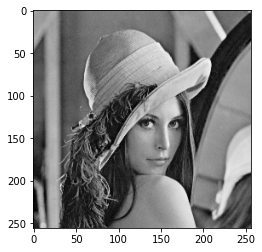

In [ ]:
plt.imshow(img,cmap="gray")

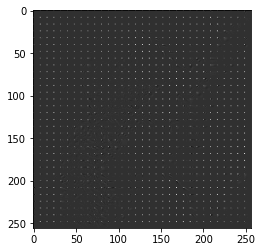

In [ ]:
#Find DCT of the given image using DCT function 
N=8 #Size of the block
imgdct = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               imgdct[row*N:(row+1)*N,col*N:(col+1)*N]= dct2(img[row*N:(row+1)*N,col*N:(col+1)*N])
plt.imshow(imgdct, cmap="gray")

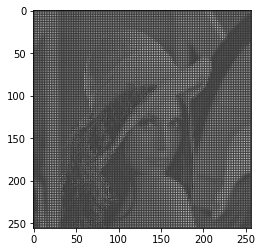

In [ ]:
#Find DCT of the given image using DCT function 
N=2 #Size of the block
imgdct = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               imgdct[row*N:(row+1)*N,col*N:(col+1)*N]= dct2(img[row*N:(row+1)*N,col*N:(col+1)*N])
plt.imshow(imgdct, cmap="gray")

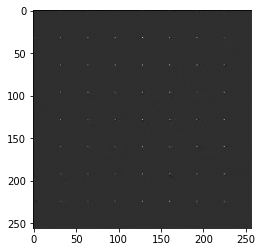

In [ ]:
#Find DCT of the given image using DCT function 
N=32 #Size of the block
imgdct = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               imgdct[row*N:(row+1)*N,col*N:(col+1)*N]= dct2(img[row*N:(row+1)*N,col*N:(col+1)*N])
plt.imshow(imgdct, cmap="gray")

In [ ]:
#Total energy of the image
energy= np.sum(img**2)
print(energy)

6941402


In [ ]:
#For compression, retaining only P percent coefficients with max magnitude. 
P= 0.0001*energy
Inew= np.where(imgdct**2 > P, imgdct,0)

In [ ]:
# Finding the nonzero values in the compressed matrix
ind,val= np.unique(Inew,return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])
print(nonzeros)

5585


In [ ]:
#finding nonzero values in the compressed matrix
nonzeros= np.sum([Inew!=0])
print(nonzeros)

5585


In [ ]:
#Compression Ratio
CR= (m*n)/nonzeros
print("total Coefficient in the inpur image is ", m*n)
print("total coefficients retained in the output image is ", nonzeros)
print("compression ratio = input size/output size = ", CR)

total Coefficient in the inpur image is  65536
total coefficients retained in the output image is  5585
compression ratio = input size/output size =  11.734288272157565


In [ ]:
#Find IDCT of the given image  using IDCT function
inew = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):

               inew[row*N:(row+1)*N,col*N:(col+1)*N]= idct2(Inew[row*N:(row+1)*N,col*N:(col+1)*N])

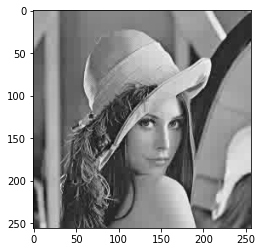

In [ ]:
plt.imshow(inew,cmap="gray")

Text(0.5, 1.0, 'Applying Dct on original with coefficients with energy more that 0.01%')

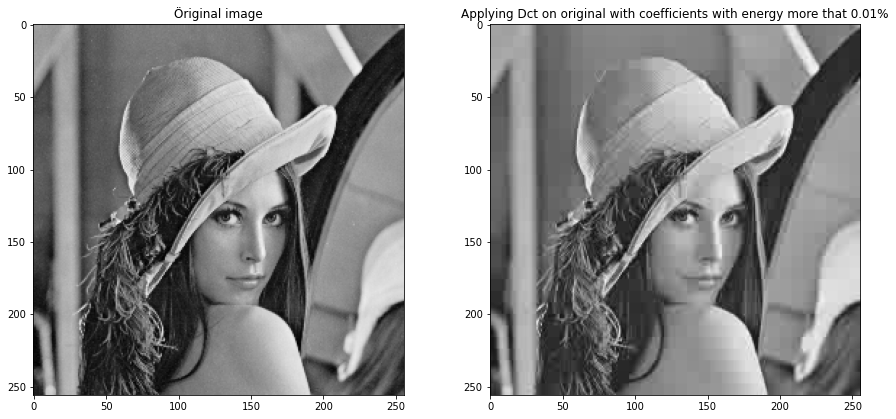

In [ ]:
fig = plt.figure(figsize=(15,15),facecolor='w')
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.title("Öriginal image")
plt.subplot(2,2,2)
plt.imshow(inew, "gray")
plt.title("Applying Dct on original with coefficients with energy more that 0.01%")

Here you can see a faint difference between the two images.

In [ ]:
#For compression, retaining only P percent coefficients with max magnitude. 
P= 0.0005*energy
Inew1= np.where(imgdct**2 > P, imgdct,0)

In [ ]:
# Finding the nonzero values in the compressed matrix
ind,val= np.unique(Inew,return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])
print(nonzeros)

2595


In [ ]:
#finding nonzero values in the compressed matrix
nonzeros= np.sum([Inew!=0])
print(nonzeros)

2595


In [ ]:
#Compression Ratio
CR= (m*n)/nonzeros
print("total Coefficient in the inpur image is ", m*n)
print("total coefficients retained in the output image is ", nonzeros)
print("compression ratio = input size/output size = ", CR)

total Coefficient in the inpur image is  65536
total coefficients retained in the output image is  2595
compression ratio = input size/output size =  25.254720616570328


In [ ]:
#Find IDCT of the given image  using IDCT function
inew1 = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):

               inew1[row*N:(row+1)*N,col*N:(col+1)*N]= idct2(Inew1[row*N:(row+1)*N,col*N:(col+1)*N])

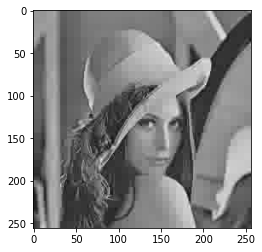

In [ ]:
plt.imshow(inew1,cmap="gray")

In [ ]:
#For compression, retaining only P percent coefficients with max magnitude. 
P= 0.1*energy
Inew2= np.where(imgdct**2 > P, imgdct,0)

In [ ]:
# Finding the nonzero values in the compressed matrix
ind,val= np.unique(Inew,return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])
print(nonzeros)

2595


In [ ]:
#finding nonzero values in the compressed matrix
nonzeros= np.sum([Inew!=0])
print(nonzeros)

2595


In [ ]:
#Compression Ratio
CR= (m*n)/nonzeros
print("total Coefficient in the inpur image is ", m*n)
print("total coefficients retained in the output image is ", nonzeros)
print("compression ratio = input size/output size = ", CR)

total Coefficient in the inpur image is  65536
total coefficients retained in the output image is  2595
compression ratio = input size/output size =  25.254720616570328


In [ ]:
#Find IDCT of the given image  using IDCT function
inew2 = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):

               inew2[row*N:(row+1)*N,col*N:(col+1)*N]= idct2(Inew2[row*N:(row+1)*N,col*N:(col+1)*N])

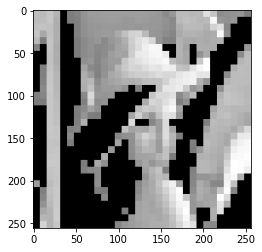

In [ ]:
plt.imshow(inew2,cmap="gray")

In [ ]:
#For compression, retaining only P percent coefficients with max magnitude. 
P= 0.34675*energy
Inew3= np.where(imgdct**2 > P, imgdct,0)

In [ ]:
# Finding the nonzero values in the compressed matrix
ind,val= np.unique(Inew,return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])
print(nonzeros)

2595


In [ ]:
#finding nonzero values in the compressed matrix
nonzeros= np.sum([Inew!=0])
print(nonzeros)

2595


In [ ]:
#Compression Ratio
CR= (m*n)/nonzeros
print("total Coefficient in the inpur image is ", m*n)
print("total coefficients retained in the output image is ", nonzeros)
print("compression ratio = input size/output size = ", CR)

total Coefficient in the inpur image is  65536
total coefficients retained in the output image is  2595
compression ratio = input size/output size =  25.254720616570328


In [ ]:
#Find IDCT of the given image  using IDCT function
inew3 = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):

               inew3[row*N:(row+1)*N,col*N:(col+1)*N]= idct2(Inew3[row*N:(row+1)*N,col*N:(col+1)*N])

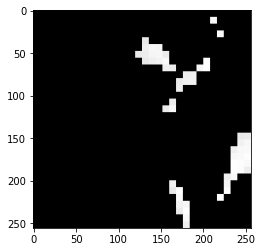

In [ ]:
plt.imshow(inew3,cmap="gray")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Applying Dct on original with coefficients with energy more that 0.34675%')

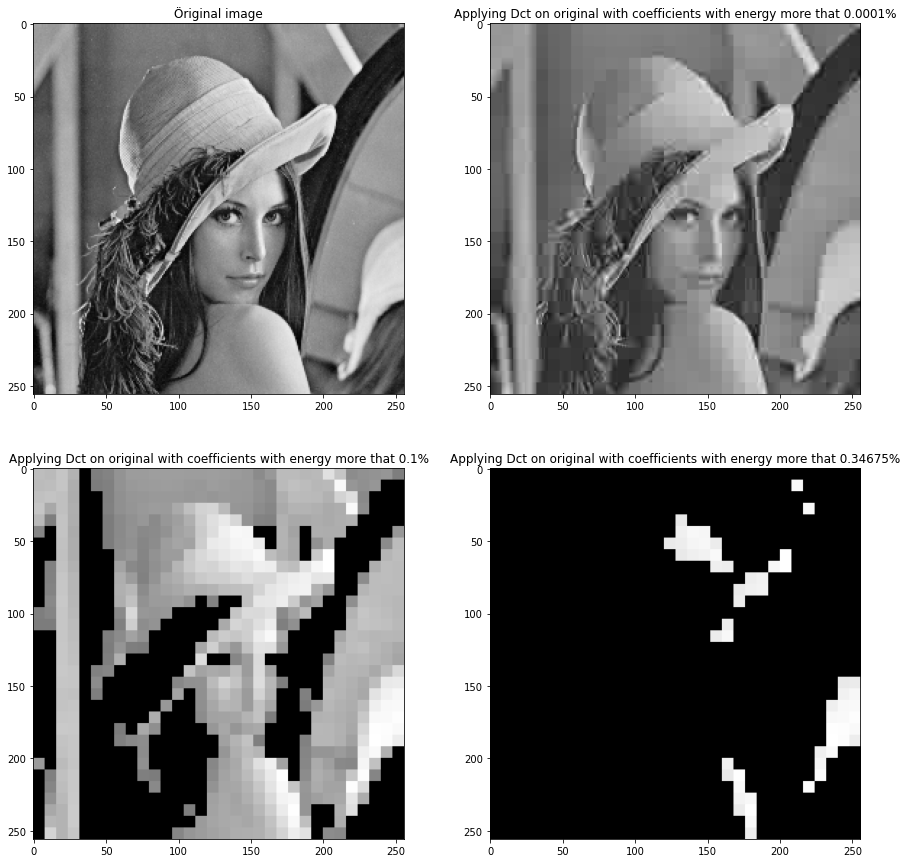

In [ ]:
fig = plt.figure(figsize=(15,15),facecolor='w')
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.title("Öriginal image")
plt.subplot(2,2,2)
plt.imshow(inew, "gray")
plt.title("Applying Dct on original with coefficients with energy more that 0.0001%")
plt.subplot(2,2,3)
plt.imshow(inew1, "gray")
plt.title("Applying Dct on original with coefficients with energy more that 0.0005%")
plt.subplot(2,2,3)
plt.imshow(inew2, "gray")
plt.title("Applying Dct on original with coefficients with energy more that 0.1%")
plt.subplot(2,2,4)
plt.imshow(inew3, "gray")
plt.title("Applying Dct on original with coefficients with energy more that 0.34675%")


So from the above 4 images we can infer that with energy more tham 0.0001% the image is almost similar to the original image only the greyish tinge is a bit less with 0.1% the image is very blurred and we can see patches of grey and black and white and ith 0.34675% we can see only balck and white and the image is completely distorted

Mean Square Error(Mse)

In [ ]:
def mse(img, inew):
  #the squared image between the 2 images is the sum of the squared difference between the two images
  err = np.sum((img.astype("float") - inew.astype("float")) ** 2)
  err /= float(img.shape[0] * inew.shape[1])
  return err

 #the lower the error, the more "similar" it is.
m = mse(imgdct, img)
print("The Mean Square error is: ",m)  

The Mean Square error is:  34331.6139831543


In [ ]:
def mse(img, inew1):
  #the squared image between the 2 images is the sum of the squared difference between the two images
  err = np.sum((img.astype("float") - inew1.astype("float")) ** 2)
  err /= float(img.shape[0] * inew1.shape[1])
  return err

 #the lower the error, the more "similar" it is.
m = mse(imgdct, inew1)
print("The Mean Square error is: ",m) 

The Mean Square error is:  34068.562744140625


In [ ]:
def mse(img, inew2):
  #the squared image between the 2 images is the sum of the squared difference between the two images
  err = np.sum((img.astype("float") - inew2.astype("float")) ** 2)
  err /= float(img.shape[0] * inew2.shape[1])
  return err

 #the lower the error, the more "similar" it is.
m1 = mse(imgdct, inew2)
print("The Mean Square error is: ",m1) 

The Mean Square error is:  31761.30108642578


In [ ]:
def mse(img, inew3):
  #the squared image between the 2 images is the sum of the squared difference between the two images
  err = np.sum((img.astype("float") - inew3.astype("float")) ** 2)
  err /= float(img.shape[0] * inew3.shape[1])
  return err

 #the lower the error, the more "similar" it is.
m = mse(imgdct, inew3)
print("The Mean Square error is: ",m) 

The Mean Square error is:  19943.941802978516
